In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statistics import mean
from scipy.stats import sem
from math import sqrt
from archpy import arch

C:\Users\User\miniconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [33]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm


In [34]:
def mean_absolute_percentage_error(y_true, y_pred): 

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [35]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

In [36]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [37]:
tsla = pd.read_csv("airport.csv")

In [39]:
tsla

,Year,Month Number,Month,Utility,Owner,Units,Usage
0,2013,1,Jan,Passengers,Campus,PAX,3.209356e+06
1,2013,1,Jan,Gas,Commission,Therms,3.632050e+05
2,2013,1,Jan,Gas,Tenant,Therms,4.939300e+04
3,2013,1,Jan,Electricity,Commission,kWh,1.290435e+07
4,2013,1,Jan,Electricity,Tenant,kWh,1.400216e+07
...,...,...,...,...,...,...,...
555,2019,8,Aug,Gas,Tenant,Therms,6.160002e+03
556,2019,8,Aug,Electricity,Commission,kWh,1.563947e+07
557,2019,8,Aug,Electricity,Tenant,kWh,1.251209e+07
558,2019,8,Aug,Water,Commission,Million Gallons,2.767076e+01


In [40]:
cls = tsla[tsla['Utility'] == 'Electricity']['Usage']

In [41]:
cls.reset_index(drop=True, inplace=True)

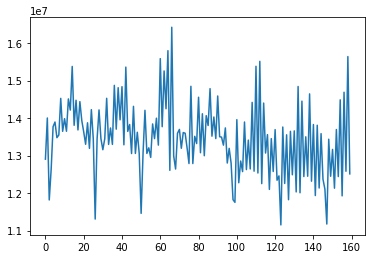

In [42]:
plt.plot(cls)

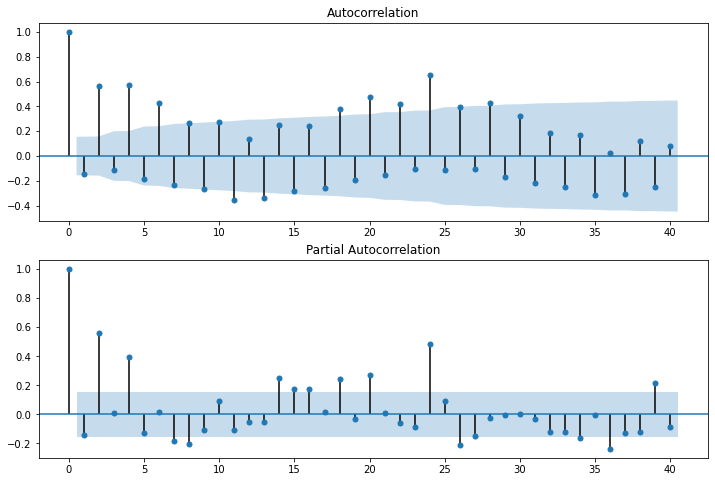

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(cls.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(cls, lags=40, ax=ax2)


In [12]:
arma_mod20 = sm.tsa.ARMA(cls, (2,0)).fit(disp=False)
print(arma_mod20.params)

const          1.345158e+07
ar.L1.Usage   -6.956655e-02
ar.L2.Usage    5.682449e-01
dtype: float64


In [13]:
arma_mod30 = sm.tsa.ARMA(cls, (3,0)).fit(disp=False)
print(arma_mod30.params)

const          1.345158e+07
ar.L1.Usage   -6.226426e-02
ar.L2.Usage    5.676940e-01
ar.L3.Usage   -1.313322e-02
dtype: float64


In [14]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod30.hqic)


4808.867985372494 4821.16868063343 4817.085010476619


In [15]:
sm.stats.durbin_watson(arma_mod30.resid.values)


1.9902059131698275

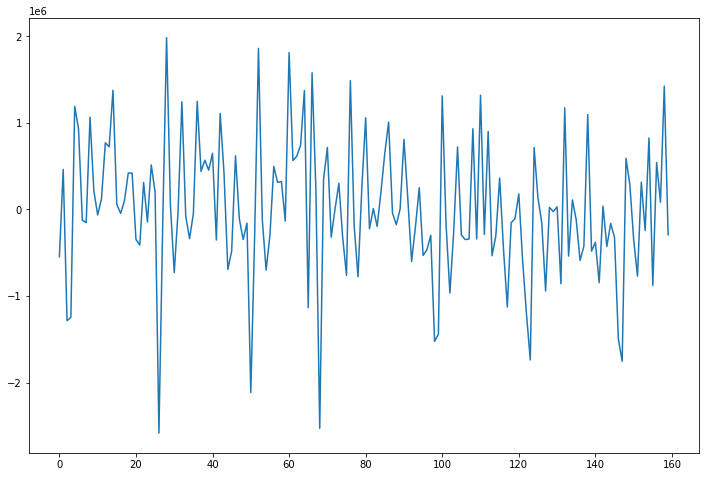

In [16]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);


In [17]:
resid = arma_mod30.resid


In [18]:
stats.normaltest(resid)


NormaltestResult(statistic=5.99172646108589, pvalue=0.049993452579276905)

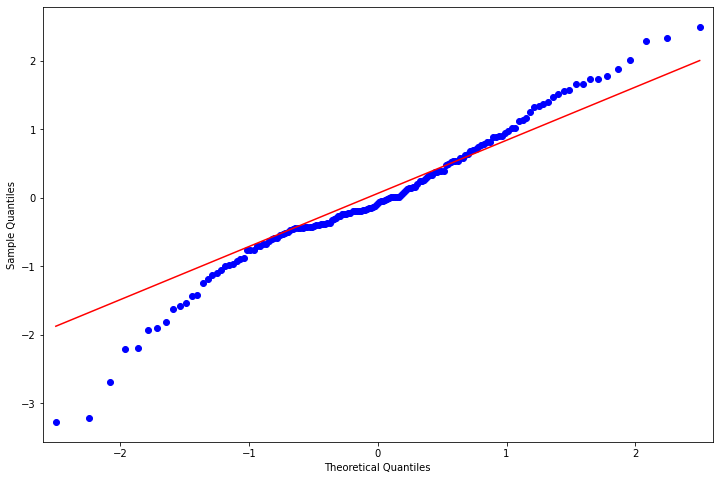

In [19]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

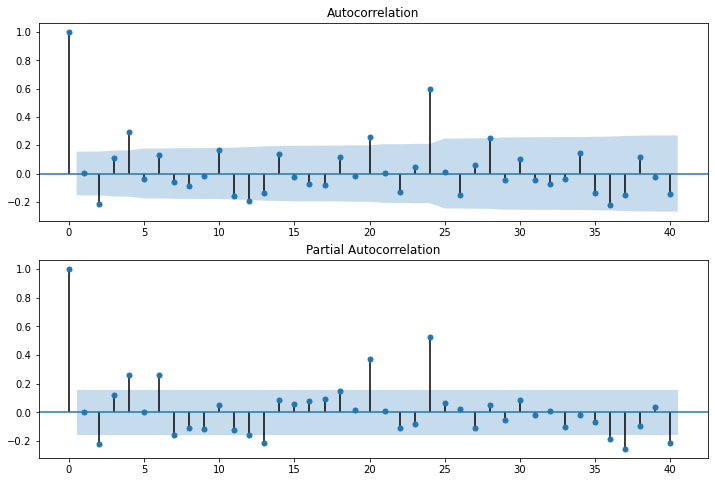

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [21]:

r,q,p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0   0.002907    0.001378  9.703932e-01
2.0  -0.215553    7.623652  2.210777e-02
3.0   0.111899    9.690877  2.138510e-02
4.0   0.291403   23.799945  8.759844e-05
5.0  -0.037520   24.035351  2.137430e-04
6.0   0.132559   26.992921  1.452504e-04
7.0  -0.058614   27.574960  2.624950e-04
8.0  -0.086947   28.864087  3.349903e-04
9.0  -0.018563   28.923240  6.676439e-04
10.0  0.166229   33.698063  2.077524e-04
11.0 -0.160731   38.192209  7.260197e-05
12.0 -0.193421   44.744328  1.139774e-05
13.0 -0.136196   48.015079  6.504559e-06
14.0  0.137439   51.368622  3.595164e-06
15.0 -0.022928   51.462590  6.928632e-06
16.0 -0.077432   52.541817  8.953073e-06
17.0 -0.077623   53.633970  1.133018e-05
18.0  0.113436   55.982772  8.968409e-06
19.0 -0.015271   56.025643  1.616881e-05
20.0  0.259605   68.503338  3.190937e-07
21.0  0.002355   68.504372  6.090948e-07
22.0 -0.128598   71.610556  3.681496e-07
23.0  0.044054  

In [22]:
cls

0      12904353.0
1      14002156.0
2      11816401.0
3      12631776.0
4      13769470.0
          ...    
155    11925845.5
156    14688195.1
157    12581588.4
158    15639474.5
159    12512092.6
Name: Usage, Length: 160, dtype: float64

In [23]:
predictions = arma_mod30.predict(128, 160, dynamic=True)
print(predictions)

128    1.362665e+07
129    1.251508e+07
130    1.363066e+07
131    1.290648e+07
132    1.359948e+07
133    1.313057e+07
134    1.356269e+07
135    1.326048e+07
136    1.353077e+07
137    1.333671e+07
138    1.350620e+07
139    1.338193e+07
140    1.348843e+07
141    1.340903e+07
142    1.347606e+07
143    1.342541e+07
144    1.346767e+07
145    1.343540e+07
146    1.346206e+07
147    1.344153e+07
148    1.345837e+07
149    1.344531e+07
150    1.345596e+07
151    1.344766e+07
152    1.345439e+07
153    1.344912e+07
154    1.345338e+07
155    1.345004e+07
156    1.345273e+07
157    1.345061e+07
158    1.345231e+07
159    1.345097e+07
160    1.345205e+07
dtype: float64


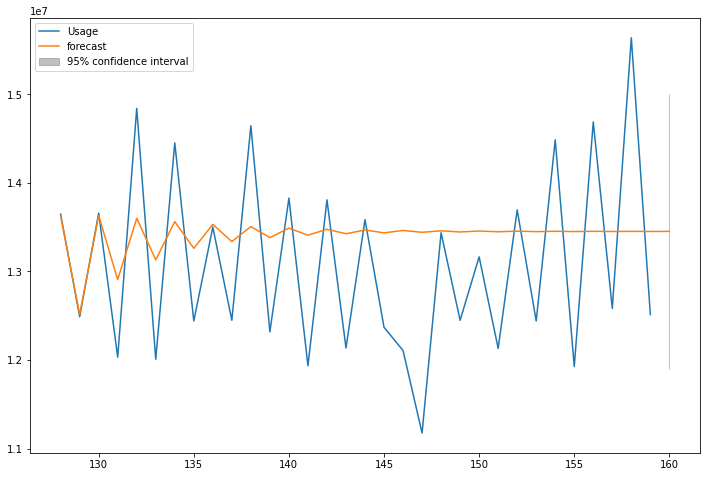

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = cls.loc[128:].plot(ax=ax)
fig = arma_mod30.plot_predict(128, 160, dynamic=True, ax=ax, plot_insample=False)


                             ARIMA Model Results                              
Dep. Variable:                D.Usage   No. Observations:                  159
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2396.323
Method:                       css-mle   S.D. of innovations         846347.306
Date:                Tue, 26 May 2020   AIC                           4800.645
Time:                        12:29:18   BIC                           4812.921
Sample:                             1   HQIC                          4805.630
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2467.0465   3.29e+04     -0.075      0.940   -6.69e+04     6.2e+04
ar.L1.D.Usage    -0.9228      0.079    -11.737      0.000      -1.077      -0.769
ar.L2.D.Usage    -0.1275      0.080     

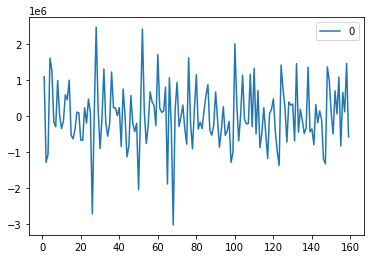

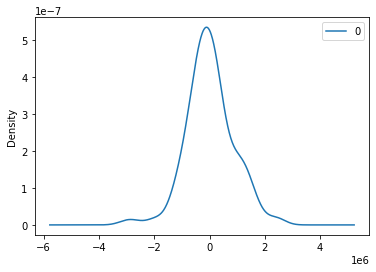

                  0
count  1.590000e+02
mean   1.746556e+04
std    8.519818e+05
min   -3.023647e+06
25%   -4.507245e+05
50%   -2.648918e+04
75%    4.326550e+05
max    2.476628e+06


In [25]:
model = ARIMA(cls, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [26]:
avoc1 = cls

predicted=13107722.186854, expected=13646157.300000
predicted=12343939.253781, expected=12488011.000000
predicted=13186991.173725, expected=13658319.100000
predicted=12832289.847541, expected=12030752.000000
predicted=13264796.967395, expected=14841736.200000
predicted=12621430.129980, expected=12008055.400000
predicted=14081453.874031, expected=14451264.800000
predicted=12735095.530210, expected=12440369.000000
predicted=13854568.345404, expected=13500345.900000
predicted=12889177.085171, expected=12448558.000000
predicted=13221251.383229, expected=14644975.600000
predicted=12840326.070010, expected=12317048.000000
predicted=14081055.245823, expected=13827617.100000
predicted=12846070.970262, expected=11934021.000000
predicted=13413164.083425, expected=13808231.200000
predicted=12401421.309239, expected=12135132.300000
predicted=13366256.374752, expected=13584273.100000
predicted=12523590.840864, expected=12368820.600000
predicted=13253238.570995, expected=12106357.300000
predicted=12

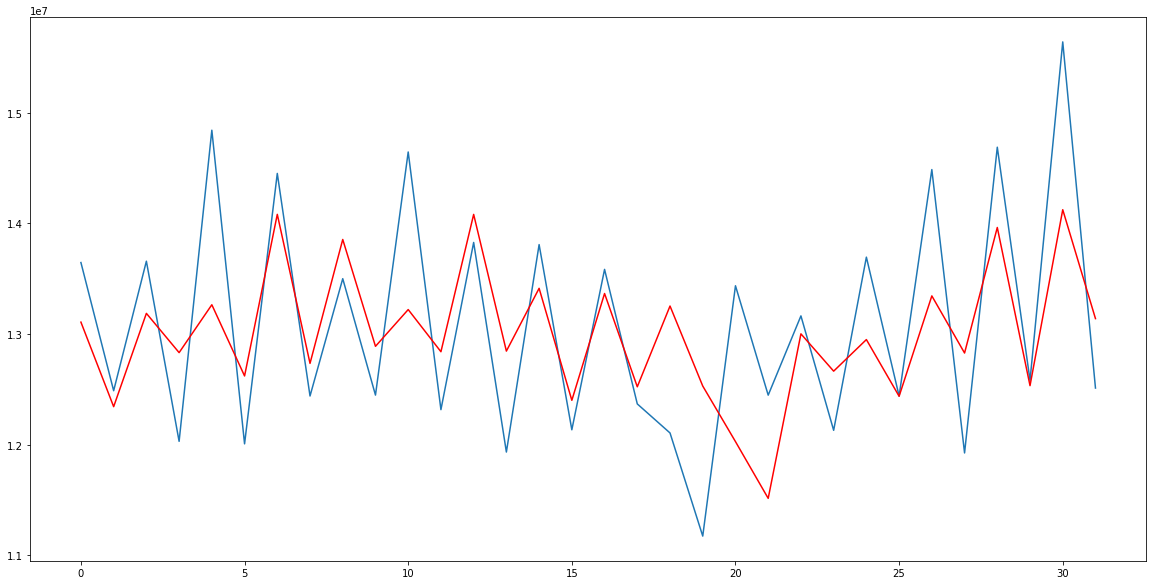

In [27]:
X = avoc1.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
fig = plt.figure(figsize=(20, 10))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [28]:
print(mean_absolute_error(test, predictions))
print(rmse(test, predictions))
print(mean_absolute_percentage_error(test, predictions))

656212.0975411823
1220148.1629858545
7.557473175671007


predicted=13409545.043916, expected=13646157.300000
predicted=12309348.076765, expected=12488011.000000
predicted=13330827.355806, expected=13658319.100000
predicted=12373157.348774, expected=12030752.000000
predicted=13444845.955298, expected=14841736.200000
predicted=12541065.144371, expected=12008055.400000
predicted=13882740.713733, expected=14451264.800000
predicted=12414745.401563, expected=12440369.000000
predicted=14313552.911604, expected=13500345.900000
predicted=12523120.223340, expected=12448558.000000
predicted=13785678.659113, expected=14644975.600000
predicted=12629634.168556, expected=12317048.000000
predicted=13802498.259784, expected=13827617.100000
predicted=12699973.068670, expected=11934021.000000
predicted=14008830.523054, expected=13808231.200000
predicted=12373003.910073, expected=12135132.300000
predicted=13570295.445225, expected=13584273.100000
predicted=12259573.727293, expected=12368820.600000
predicted=13500378.515725, expected=12106357.300000
predicted=12

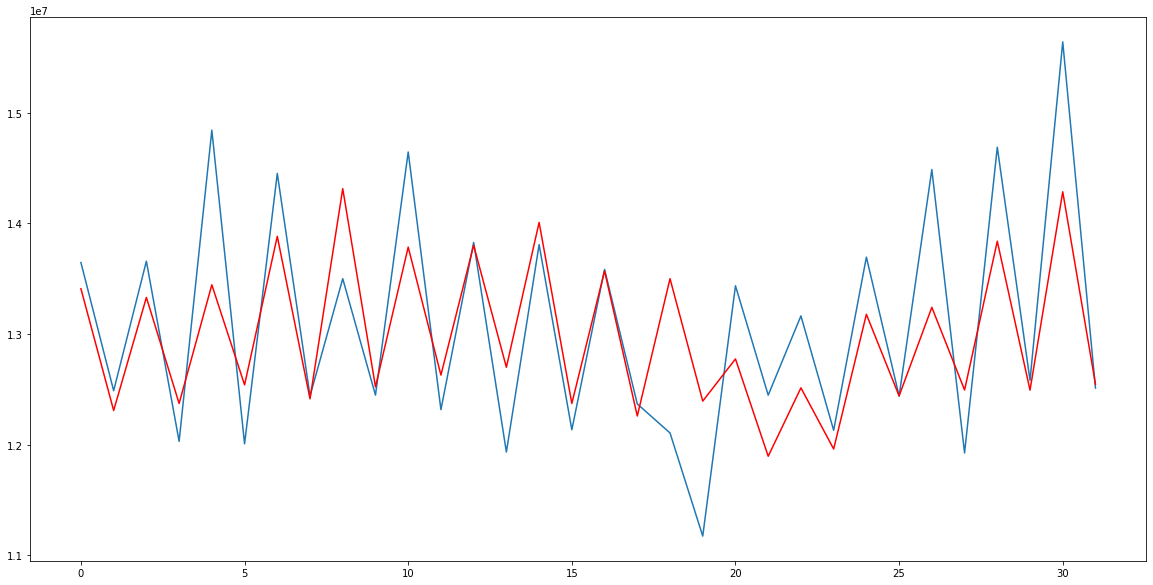

In [29]:
X = avoc1.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
fig = plt.figure(figsize=(20, 10))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [30]:
print(mean_absolute_error(test, predictions))
print(rmse(test, predictions))
print(mean_absolute_percentage_error(test, predictions))

510129.397419533
1269069.1580361568
7.616239008437539


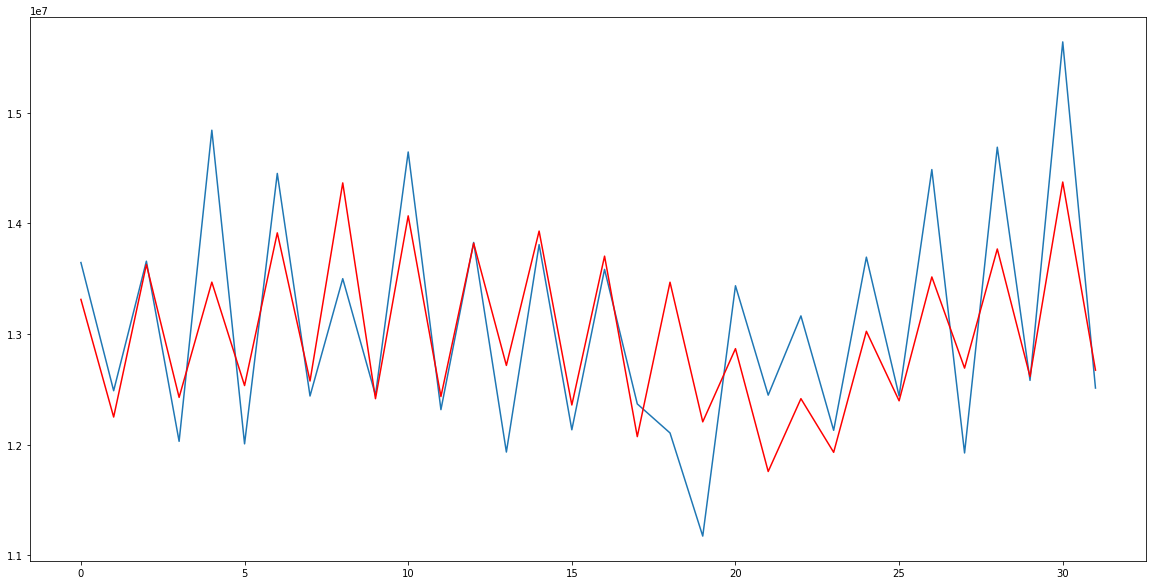

In [46]:
predictions = arch(cls, 'arch')

fig = plt.figure(figsize=(20, 10))
pyplot.plot(range(len(cls[int(len(avoc1) * 0.8):len(cls)])), cls[int(len(avoc1) * 0.8):len(cls)])
pyplot.plot(range(len(predictions)), predictions, color='red')
pyplot.show()

In [47]:
print(mean_squared_error(test, predictions))
print(mean_absolute_error(test, predictions))
print(rmse(test, predictions))
print(mean_absolute_percentage_error(test, predictions))

420090644827.4677
504504.1871908226
1294338.872880261
7.806217410080468


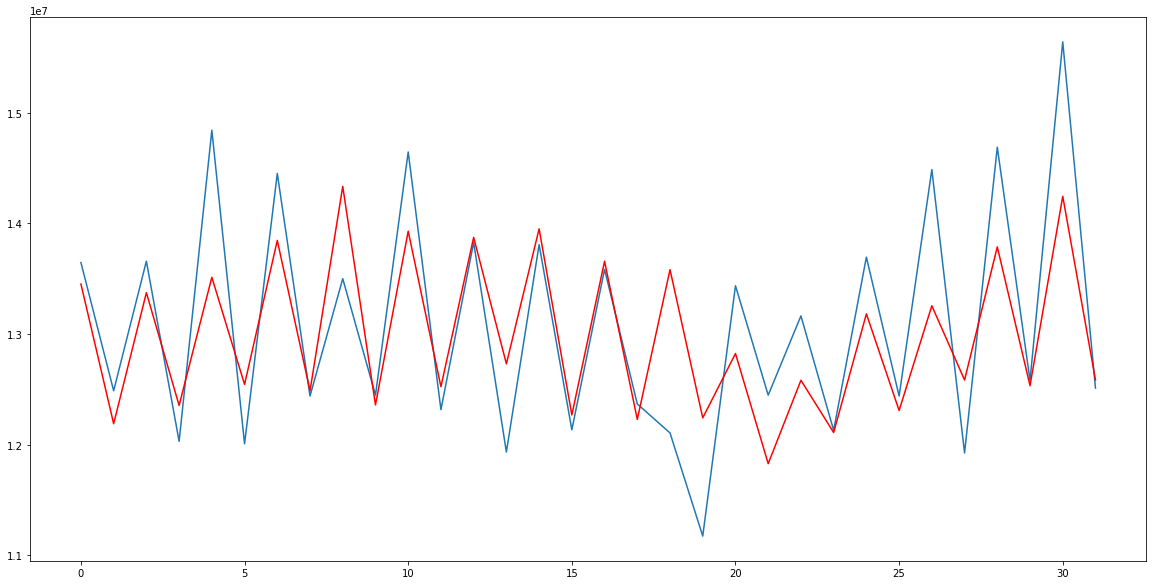

In [54]:
predictions = arch1(cls, 'garch')

fig = plt.figure(figsize=(20, 10))
pyplot.plot(range(len(predictions)), cls[int(len(avoc1) * 0.8):len(cls)])
pyplot.plot(range(len(predictions)), predictions, color='red')
pyplot.show()

In [55]:
print(mean_squared_error(test, predictions))
print(mean_absolute_error(test, predictions))
print(rmse(test, predictions))
print(mean_absolute_percentage_error(test, predictions))

440643396315.9113
503836.3395426686
1280639.4691725136
7.6990095510616126
